array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>],
       [<AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>],
       [<AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>],
       [<AxesSubplot:title={'center':'12'}>,
        <AxesSubplot:title={'center':'13'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

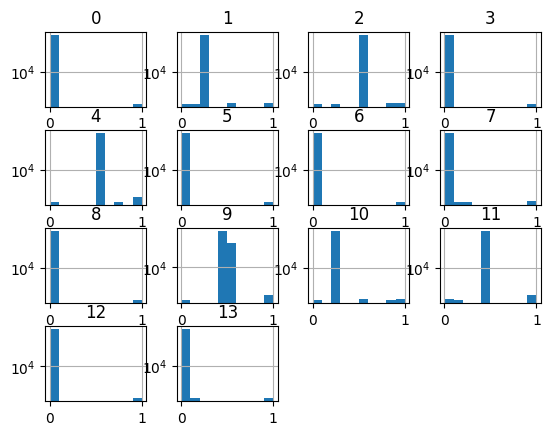

In [2]:
import pandas as pd
import numpy as np
from pyprojroot import here

D7 = np.load(here('data/ori/D7_eeg/D7_eeg_train.npy'))
D7 = D7.reshape(D7.shape[0]*D7.shape[1], 14)
df7 = pd.DataFrame(D7)
df7.hist(log=True)

<AxesSubplot:>

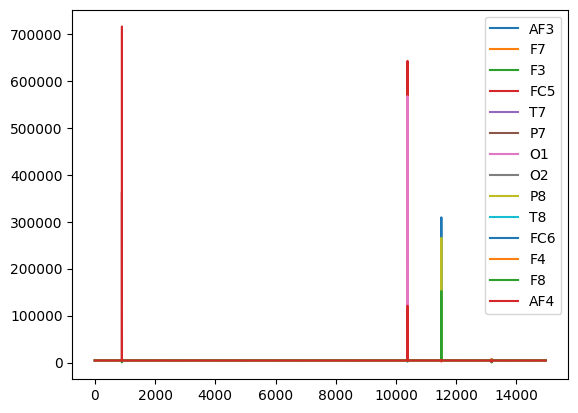

In [5]:
D7_raw = pd.read_csv(here('data/ori_raw/D7_eeg.csv'))
D7_raw.plot()

array([[<AxesSubplot:title={'center':'AF3'}>,
        <AxesSubplot:title={'center':'F7'}>,
        <AxesSubplot:title={'center':'F3'}>,
        <AxesSubplot:title={'center':'FC5'}>],
       [<AxesSubplot:title={'center':'T7'}>,
        <AxesSubplot:title={'center':'P7'}>,
        <AxesSubplot:title={'center':'O1'}>,
        <AxesSubplot:title={'center':'O2'}>],
       [<AxesSubplot:title={'center':'P8'}>,
        <AxesSubplot:title={'center':'T8'}>,
        <AxesSubplot:title={'center':'FC6'}>,
        <AxesSubplot:title={'center':'F4'}>],
       [<AxesSubplot:title={'center':'F8'}>,
        <AxesSubplot:title={'center':'AF4'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

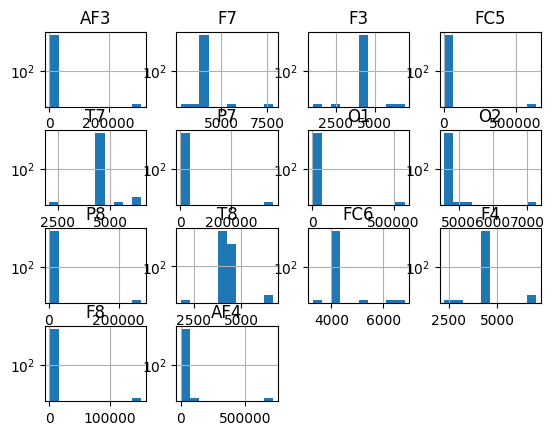

In [18]:
D7_raw.hist(log=True)

<AxesSubplot:>

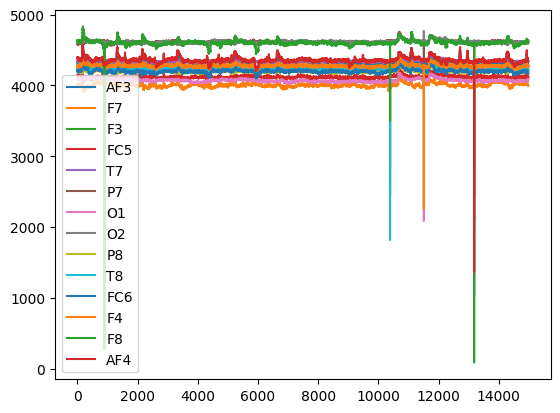

In [16]:
D7_no_outliers = D7_raw.mask((D7_raw > 5000))
D7_no_outliers.plot()

array([[<AxesSubplot:title={'center':'AF3'}>,
        <AxesSubplot:title={'center':'F7'}>,
        <AxesSubplot:title={'center':'F3'}>,
        <AxesSubplot:title={'center':'FC5'}>],
       [<AxesSubplot:title={'center':'T7'}>,
        <AxesSubplot:title={'center':'P7'}>,
        <AxesSubplot:title={'center':'O1'}>,
        <AxesSubplot:title={'center':'O2'}>],
       [<AxesSubplot:title={'center':'P8'}>,
        <AxesSubplot:title={'center':'T8'}>,
        <AxesSubplot:title={'center':'FC6'}>,
        <AxesSubplot:title={'center':'F4'}>],
       [<AxesSubplot:title={'center':'F8'}>,
        <AxesSubplot:title={'center':'AF4'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

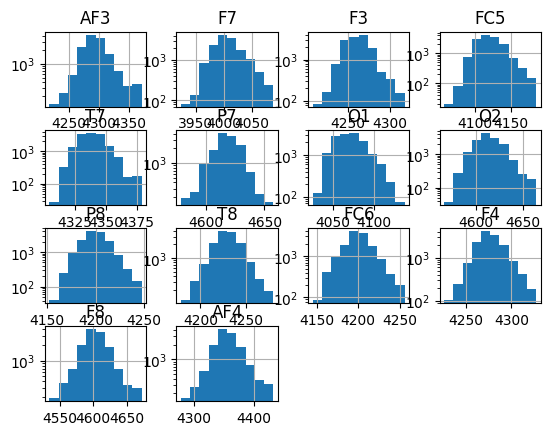

In [29]:
df = D7_raw

# Step 1: Compute median
median = df.median()

# Step 2: Compute MAD
mad = (df - median).abs().median()

modified_z_score = 0.6745 * (df - median) / mad

threshold = 3.5
D7_no_outliers = df.mask(modified_z_score.abs() > threshold, np.nan)

D7_no_outliers.hist(log=True)

<AxesSubplot:>

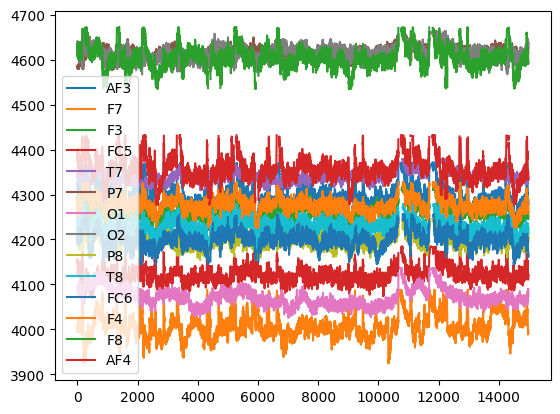

In [30]:
D7_no_outliers.plot()

<AxesSubplot:>

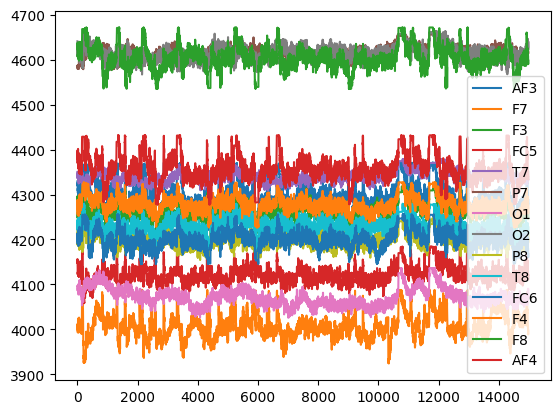

In [31]:
D7_no_outliers.fillna(method='ffill').fillna(method='bfill').plot()


<AxesSubplot:>

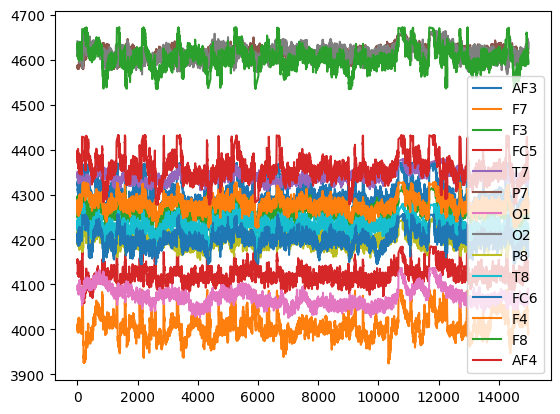

In [38]:
D7_no_outliers.interpolate(limit_direction='both').plot()